In [ ]:
talk abbout why we need to do train test split instead of training only one 100% of the data

#Fitting

### Introduction to fitting

In the context of machine learning, fitting is an extremely important process that determines how well your model performs. This process is carried out by fitting algorithms.


Fitting algorithms are powerful mathematical techniques used to identify patterns and relationships within a given dataset, ensuring accuracy in the model's predictions.


Different models utilize various fitting methods, which is partly why some machine learning algorithms are more appropriate for your data than others.

The fitting algorithms commonly used include:
- linear regression
- logistic regression
- Decision trees
- Gradient boosting algorithm
- Ridge regression


### Classification Reports

Before we fully look at overfitting and underfitting, let us first understand ground concepts

Provided by Sklearn, the classification report is a good tool of which enables you to test and see how well your ML model performs!

Here is the basic import and use of it

In [ ]:
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
import pandas as pd


# Here, im taking an example dataset from sklearn to demonstrate the classification report
# Return_X_y just splits the data into inputs and outputs easily for you.
# as_frame simply outlines the form of which you obtain the data. When true, it would return a pandas dataframe.
Data_x, Data_y = load_iris(return_X_y = True, as_frame = True)


# https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split # Sklearn provides an effective and simple way to split up data in an effective and efficient way

X_train, X_test, Y_train, Y_test = train_test_split(Data_x, Data_y, test_size=0.8, shuffle = True)  #Here we are splitting the data up so we will be able to actually test the accuracy of our model


from sklearn.ensemble import RandomForestClassifier # just a quick classification task

Random_forest = RandomForestClassifier() # The model import

Random_forest.fit(X_train, Y_train) # the model itself is fitting the data here


from sklearn.metrics import classification_report # This is the actual calssification report


print(classification_report(Y_test, Random_forest.predict(X_test)))  #  To use the classification report, you need two parameters, your models calssifications and predictions as well as the actual imperical values

# Here are the metrics of which we review to evaluate the model.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.95      0.95      0.95        37
           2       0.95      0.95      0.95        41

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



### Important concepts

1. True Negatives: These includes the datapoints the model classifies as negative that are actually negative.

---

2. True Positives: These include datapoints the model classifies as positive that are actually positive.

---
3. False Negatives: These datapoints include data values of which the model classifies as negatives, but actually ase positives.

---

4. False Positives These datapoints include data values of which the model classifies as positives, but actually as negatives.

---




In [ ]:
 # These concepts are incredably important, make sure to understand them completely

#### The classification report

##### Precision:

Precision values are located here on the classification report



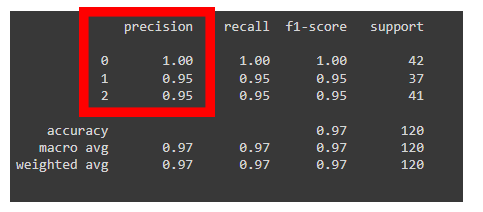

Precision is calculated within the classification report as the number of true positives divided by the sum of the true positives and dalse positives

Precision is the ability of a classifier not to label an instance positive  when it is actually negative.




##### Recall

Recall, which is located here:

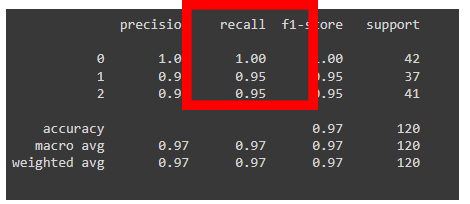

describes the fraction of positives the model guessed correctly

##### F1 score

The F1 score is the harmonic mean of precision and recall, providing a more comprehensive measure than either alone.

Here is where you would find it:

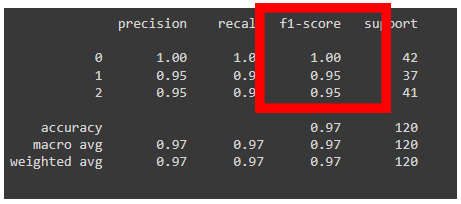



it is calculated like this:

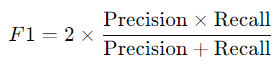

### Overfitting


#### Introduction

Overfitting occurs when a machine learning model becomes too complex and learns not only the underlying patterns in the training data but also the noise or irrelevant details. This results in excellent performance on the training data but poor generalization to new, unseen data. In other words, the model memorizes the training set rather than learning general patterns that can apply to real-world scenarios.

For example, imagine you are using a random forest classification model with too many trees or allowing each tree to grow very deep. The model might end up capturing even the smallest fluctuations in the training data, leading to overly specific rules. While this might give very high accuracy on the training set, it will struggle when faced with new data because it has not learned to generalize beyond the specific examples it has seen.

Overfitting can be addressed by simplifying the model, using techniques like regularization, cross-validation, or pruning trees to avoid excessive complexity.









In [ ]:
# This code was taken from the sklearn Randomforest classifier documentation, and modified as to provide an example
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10000, n_features=4,
                           n_informative=2, n_redundant=2,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(n_estimators = 10000, max_leaf_nodes = 100, max_depth=20, random_state=0) # These parameters that I have set highly will result in overfitting
clf.fit(X, y)

from sklearn.metrics import classification_report # This is going to be your best friend, the classification report gives you model metrics on its inference when considering new data

print("______________________________________________________________________________________________________________")
print("Overfitted model test on its own training data")
print("______________________________________________________________________________________________________________")
print(classification_report(y, clf.predict(X)))


X_2, y_2 = make_classification(n_samples=100, n_features=4, random_state=0, shuffle=False)

print("______________________________________________________________________________________________________________")
print("Overfitted model test on new data")
print("______________________________________________________________________________________________________________")
print(classification_report(y_2, clf.predict(X_2)))




______________________________________________________________________________________________________________
Overfitted model test on its own training data
______________________________________________________________________________________________________________
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      4993
           1       0.91      0.96      0.94      5007

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

______________________________________________________________________________________________________________
Overfitted model test on new data
______________________________________________________________________________________________________________
              precision    recall  f1-score   support

           0       0.44      0.62      0.52        50
           1       0.37      0.22      

As seen here, this is mostly what you are looking for when determining wether your model is overfitting, you want to compare its training to its inference capability.

###Underfitting

#### Introduction

Underfitting occurs when a machine learning model is too simple to capture the underlying patterns in the data. This happens when the model fails to learn enough from the training data, resulting in poor performance on both the training set and unseen (test) data. In other words, the model doesn't have enough complexity to represent the relationships in the data.

For example, let's say you are using a random forest classification model. If you use too few trees or limit the depth of each tree too much, the model may not capture the complexities in the data, leading to underfitting. In this case, the model will make overly simplistic predictions, resulting in low accuracy for both training and testing datasets.

Underfitting is usually a sign that the model needs more features, higher complexity, or better tuning to fit the data appropriately.









In [ ]:
# This code was taken from the sklearn Randomforest classifier documentation, and modified as to provide an example
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10000, n_features=4,
                           n_informative=2, n_redundant=2,
                           random_state=0, shuffle=False)

# The parameters below are set very low to intentionally cause underfitting
clf = RandomForestClassifier(n_estimators=5, max_leaf_nodes=5, max_depth=2, random_state=0)
clf.fit(X, y)

from sklearn.metrics import classification_report  # This is going to be your best friend, the classification report gives you model metrics on its inference when considering new data

print("______________________________________________________________________________________________________________")
print("Underfitted model test on its own training data")
print("______________________________________________________________________________________________________________")
print(classification_report(y, clf.predict(X)))


X_2, y_2 = make_classification(n_samples=100, n_features=4, random_state=0, shuffle=False)

print("______________________________________________________________________________________________________________")
print("Underfitted model test on new data")
print("______________________________________________________________________________________________________________")
print(classification_report(y_2, clf.predict(X_2)))


______________________________________________________________________________________________________________
Underfitted model test on its own training data
______________________________________________________________________________________________________________
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      4993
           1       0.87      0.86      0.87      5007

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

______________________________________________________________________________________________________________
Underfitted model test on new data
______________________________________________________________________________________________________________
              precision    recall  f1-score   support

           0       0.61      0.46      0.52        50
           1       0.56      0.70    

As seen here, this is mostly what you are looking for when determining wether your model is overfitting, you want to compare its training to its inference capability.